In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 9.3 MB/s 
     |████████████████████████████████| 175 kB 64.3 MB/s 
     |████████████████████████████████| 3.3 MB 61.9 MB/s 
     |████████████████████████████████| 596 kB 52.5 MB/s 
     |████████████████████████████████| 101 kB 13.7 MB/s 
     |████████████████████████████████| 880 kB 71.1 MB/s 
     |████████████████████████████████| 3.3 MB 32.0 MB/s 
     |████████████████████████████████| 141 kB 71.7 MB/s 
     |████████████████████████████████| 212 kB 71.6 MB/s 
     |████████████████████████████████| 127 kB 46.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=e7a4ccbd688b58925ca458821a5b4cbf420d91681abaa7db8ba5e7b04db88d4f
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-non

In [ ]:
import json
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
def date_to_int(date):
  return (10**10)*date.year + (10**8)*date.month + (10**6)*date.day + (10**4)*date.hour + (10**2)*date.minute + (10**0)*date.second

In [ ]:
def json_to_df(json_file):
  with open(json_file) as f:
    data = json.load(f)
  
  text_col = []
  date_col = []
  source_col = []
  gender_col = []
  country_col = []
  friends_col = []
  followers_col = []
  share_col = []
  like_col = []
  reply_col = []
  reach_col = []
  relevance_col = []  
  
  for document in data:
    #text
    text = document["body"]
    #date
    date_, time = document["time"].split("T")
    year, month, day = date_.split("-")
    try:
      time = time.split(".")[0]
      hour, min, sec = time.split(":")
    except:
      time = time.split("+")[0]
      hor, min, sec = time.split(":")
    date = date_to_int(datetime.datetime(int(year), int(month), int(day), int(hour), int(min), int(sec)))
    #source
    try:
      source = document["source_device"]
    except:
      source = 'unknown'
    #gender
    try:
      gender = document["gender"]
    except:
      country = gender = 'unknown'
    #country
    try:
      country = document["geocoding_country"]["display_name"]
    except:
      country = 'unknown'
    #friends
    try:
      num_friends = document["friends_count_num"]
    except:
      num_friends = 0
    #followers
    try:
      num_followers = document["followers_count_num"]
    except:
      num_followers = 0
    #like
    try:
      num_like = document["like_action_count"]
    except:
      num_like = 0
      #share
    try:
      num_share = document["share_action_count"]
    except:
      num_share = 0
    #reply
    try:
      num_reply = document["reply_action_count"]
    except:
      num_reply = 0
    #reach
    try:
      reach = document["reach"]
    except:
      reach = 0
    #relevance
    try:
      relevance = document["relevance"]
    except:
      relevance = 0
    
    text_col.append(text)
    date_col.append(date)
    source_col.append(source)
    gender_col.append(gender)
    country_col.append(country)
    friends_col.append(num_friends)
    followers_col.append(num_followers)
    like_col.append(num_like)
    share_col.append(num_share)
    reply_col.append(num_reply)
    reach_col.append(reach)
    relevance_col.append(relevance)

  return pd.DataFrame({'text': text_col, 'date': date_col, 'source': source_col,
                       'gender': gender_col, 'country': country_col, 'friends': friends_col,
                       'followers': followers_col, 'like': like_col, 'share': share_col,
                       'reply': reply_col, 'reach': reach_col, 'relevance': relevance_col})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FIGUERES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_555_2021-06-30_2022-06-30.json'
CHAVES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_609_2021-06-30_2022-06-30.json'

figueres_df = json_to_df(FIGUERES_PATH)
chaves_df = json_to_df(CHAVES_PATH)

Mounted at /content/drive


Figueres

In [ ]:
figueres_df.head()

,text,date,source,gender,country,friends,followers,like,share,reply,reach,relevance
0,Carta Abierta a la señora Vanessa Hernández Sá...,20210926160400,Twitter for Android,unknown,Colombia,658,876,30,15,0,5874.0,3.309491
1,@crhoycom Y de dónde pensará @figuerescr sacar...,20210930142700,Twitter for iPhone,male,unknown,115,111,14,2,0,1182.0,1.934317
2,@crhoycom Vaya mierda @figuerescr,20210930143800,Twitter for Android,unknown,unknown,650,265,4,1,0,421.0,0.981507
3,"@FelipeGR2020 @crhoycom ""Sin embargo, agregó q...",20210930165100,Twitter for Android,male,unknown,1301,93,0,0,0,0.0,0.000000
4,@FelipeGR2020 @crhoycom @figuerescr Ahh claro!...,20210930172700,Twitter for iPhone,male,unknown,115,111,0,0,0,0.0,0.000000


In [ ]:
figueres_df["source"].value_counts()

Twitter for Android      31507
Twitter for iPhone       20690
Twitter Web App          11329
unknown                   1166
TweetDeck                  672
                         ...  
Zendesk                      1
INoticiasCL_APP_WRI_2        1
JustoGuerrero                1
Teleradio Americas           1
Diario Neuquino Auto         1
Name: source, Length: 100, dtype: int64

In [ ]:
unique_sources = figueres_df.source.unique()
coded_sources = {}
for i, source in enumerate(unique_sources):
  coded_sources[source] = i
figueres_df["source"] = figueres_df.source.replace(coded_sources)

In [ ]:
figueres_df["gender"].value_counts()

male       31617
unknown    28246
female      7468
Name: gender, dtype: int64

In [ ]:
unique_genders = figueres_df.gender.unique()
coded_genders = {}
for i, gender in enumerate(unique_genders):
  coded_genders[gender] = i
figueres_df["gender"] = figueres_df.gender.replace(coded_genders)

In [ ]:
figueres_df["country"].value_counts()

Costa Rica                                                                             33068
unknown                                                                                30096
Mexico                                                                                   847
Colombia                                                                                 688
Spain                                                                                    636
Nicaragua                                                                                334
Chile                                                                                    289
Panama                                                                                   220
Cuba                                                                                     166
Calle América, Colectora, Santurce, San Juan, Puerto Rico, United States of America      163
Ecuador                                                               

In [ ]:
costa_rica = []
for country in figueres_df["country"]:
  if country == 'Costa Rica':
    costa_rica.append(1)
  else:
    costa_rica.append(0)
figueres_df["Costa Rica"] = pd.DataFrame(costa_rica)

In [ ]:
unique_countries = figueres_df.country.unique()
coded_countries = {}
for i, location in enumerate(unique_countries):
  coded_countries[location] = i
figueres_df["country"] = figueres_df.country.replace(coded_countries)

In [ ]:
corr = figueres_df.corr()
corr

,date,source,gender,country,friends,followers,like,share,reply,reach,relevance,Costa Rica
date,1.000000,-0.037721,0.047483,0.070075,0.004844,0.017652,-0.021475,0.004736,NaN,-0.022797,-0.033313,0.039592
source,-0.037721,1.000000,-0.057841,0.098286,0.066257,0.193760,0.055018,0.030403,NaN,0.071542,0.091772,-0.043908
gender,0.047483,-0.057841,1.000000,-0.020328,0.015420,-0.026724,0.015068,0.012339,NaN,-0.016854,0.001059,0.025112
country,0.070075,0.098286,-0.020328,1.000000,0.059263,0.045140,-0.014345,-0.003643,NaN,-0.000925,-0.012146,0.050960
friends,0.004844,0.066257,0.015420,0.059263,1.000000,0.162817,-0.000654,0.005363,NaN,-0.001359,-0.000263,0.000210
followers,0.017652,0.193760,-0.026724,0.045140,0.162817,1.000000,0.024468,0.026262,NaN,0.049859,0.052993,-0.028606
like,-0.021475,0.055018,0.015068,-0.014345,-0.000654,0.024468,1.000000,0.651545,NaN,0.126239,0.830415,-0.019963
share,0.004736,0.030403,0.012339,-0.003643,0.005363,0.026262,0.651545,1.000000,NaN,0.099453,0.567608,0.001246
reply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reach,-0.022797,0.071542,-0.016854,-0.000925,-0.001359,0.049859,0.126239,0.099453,NaN,1.000000,0.632283,-0.020481


In [ ]:
from pysentimiento import create_analyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

Downloading:   0%|          | 0.00/925 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/415M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/334 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/838k [00:00<?, ?B/s]

In [ ]:
figueres_prob_pos = []
figueres_prob_neu = []
figueres_prob_neg = []
outputs = sentiment_analyzer.predict(figueres_df["text"].to_list())
for output in outputs:
  figueres_prob_pos.append(output.probas["POS"])
  figueres_prob_neu.append(output.probas["NEU"])
  figueres_prob_neg.append(output.probas["NEG"])

Parameter 'function'=<function BaseAnalyzer._tokenize at 0x7f170a6c4170> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/2105 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 67331
  Batch size = 32


In [ ]:
figueres_scores = np.array(figueres_prob_pos) + 0.5*np.array(figueres_prob_neu) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
figueres_df["score"] = figueres_scores

In [ ]:
figueres_df.head()

,text,date,source,gender,country,friends,followers,like,share,reply,reach,relevance,Costa Rica,score
0,Carta Abierta a la señora Vanessa Hernández Sá...,20210926160400,0,0,0,658,876,30,15,0,5874.0,3.309491,0,0.429630
1,@crhoycom Y de dónde pensará @figuerescr sacar...,20210930142700,1,1,1,115,111,14,2,0,1182.0,1.934317,0,0.002254
2,@crhoycom Vaya mierda @figuerescr,20210930143800,0,0,1,650,265,4,1,0,421.0,0.981507,0,0.001656
3,"@FelipeGR2020 @crhoycom ""Sin embargo, agregó q...",20210930165100,0,1,1,1301,93,0,0,0,0.0,0.000000,0,0.589855
4,@FelipeGR2020 @crhoycom @figuerescr Ahh claro!...,20210930172700,1,1,1,115,111,0,0,0,0.0,0.000000,0,0.108665


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(figueres_df[["date", "source", "gender", "country", "friends", "followers", "like", "share", "reply", "reach", "relevance", "Costa Rica"]], figueres_df["score"],test_size=0.2)

In [ ]:
figueres_model = RandomForestRegressor()
figueres_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate on training data
train_RMSE = np.sqrt(np.mean(figueres_model.predict(X_train)-y_train)**2)
print(f'Train RMSE:\t{train_RMSE:4f}')

# Evaluate on test data
test_RMSE = np.sqrt(np.mean(figueres_model.predict(X_test)-y_test)**2)
print(f'Test RMSE:\t{test_RMSE:.4f}')

Train RMSE:	0.001866
Test RMSE:	0.0089


In [ ]:
# Calculate importance of each feature
importances = list(figueres_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance
                       in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: followers                                Importance: 0.3
Feature: friends                                  Importance: 0.27
Feature: date                                     Importance: 0.19
Feature: source                                   Importance: 0.06
Feature: relevance                                Importance: 0.04
Feature: gender                                   Importance: 0.03
Feature: like                                     Importance: 0.03
Feature: reach                                    Importance: 0.03
Feature: country                                  Importance: 0.02
Feature: share                                    Importance: 0.01
Feature: Costa Rica                               Importance: 0.01
Feature: reply                                    Importance: 0.0


Chaves

In [ ]:
chaves_df["source"].value_counts()

Twitter for Android    46985
Twitter for iPhone     31843
Twitter Web App        20549
TweetDeck               1721
Echobox                  923
                       ...  
Fogos.pt                   1
radiosantafe               1
Tweepsmap                  1
williamsv76                1
El Markovian               1
Name: source, Length: 199, dtype: int64

In [ ]:
unique_sources = chaves_df.source.unique()
coded_sources = {}
for i, source in enumerate(unique_sources):
  coded_sources[source] = i
chaves_df["source"] = chaves_df.source.replace(coded_sources)

In [ ]:
chaves_df["gender"].value_counts()

unknown    46073
male       44145
female     15405
Name: gender, dtype: int64

In [ ]:
unique_genders = chaves_df.gender.unique()
coded_genders = {}
for i, gender in enumerate(unique_genders):
  coded_genders[gender] = i
chaves_df["gender"] = chaves_df.gender.replace(coded_genders)

In [ ]:
chaves_df["country"].value_counts()

Costa Rica                                                                                      50722
unknown                                                                                         44925
Colombia                                                                                         2181
Mexico                                                                                           1572
Spain                                                                                            1308
Nicaragua                                                                                         632
Panama                                                                                            597
Ecuador                                                                                           559
Cuba                                                                                              550
Dominican Republic                                                                

In [ ]:
costa_rica = []
for country in chaves_df["country"]:
  if country == 'Costa Rica':
    costa_rica.append(1)
  else:
    costa_rica.append(0)
chaves_df["Costa Rica"] = pd.DataFrame(costa_rica)

In [ ]:
unique_countries = chaves_df.country.unique()
coded_countries = {}
for i, location in enumerate(unique_countries):
  coded_countries[location] = i
chaves_df["country"] = chaves_df.country.replace(coded_countries)

In [ ]:
chaves_prob_pos = []
chaves_prob_neu = []
chaves_prob_neg = []
outputs = sentiment_analyzer.predict(chaves_df["text"].to_list())
for output in outputs:
  chaves_prob_pos.append(output.probas["POS"])
  chaves_prob_neu.append(output.probas["NEU"])
  chaves_prob_neg.append(output.probas["NEG"])

  0%|          | 0/3301 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 105623
  Batch size = 32


In [ ]:
chaves_scores = np.array(chaves_prob_pos) + 0.5*np.array(chaves_prob_neu) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
chaves_df["score"] = chaves_scores

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(chaves_df[["date", "source", "gender", "country", "friends", "followers", "like", "share", "reply", "reach", "relevance", "Costa Rica"]], chaves_df["score"],test_size=0.2)

In [ ]:
chaves_model = RandomForestRegressor()
chaves_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate on training data
train_RMSE = np.sqrt(np.mean(chaves_model.predict(X_train)-y_train)**2)
print(f'Train RMSE:\t{train_RMSE:4f}')

# Evaluate on test data
test_RMSE = np.sqrt(np.mean(chaves_model.predict(X_test)-y_test)**2)
print(f'Test RMSE:\t{test_RMSE:.4f}')

Train RMSE:	0.002633
Test RMSE:	0.0118


In [ ]:
# Calculate importance of each feature
importances = list(chaves_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance
                       in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: followers                                Importance: 0.3
Feature: friends                                  Importance: 0.28
Feature: date                                     Importance: 0.18
Feature: source                                   Importance: 0.05
Feature: relevance                                Importance: 0.05
Feature: like                                     Importance: 0.04
Feature: gender                                   Importance: 0.03
Feature: reach                                    Importance: 0.03
Feature: country                                  Importance: 0.02
Feature: share                                    Importance: 0.01
Feature: Costa Rica                               Importance: 0.01
Feature: reply                                    Importance: 0.0


Plots

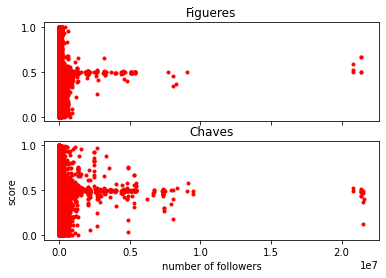

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
ax1.plot(figueres_df["followers"],  figueres_df["score"], 'ro', markersize=3)
ax2.plot(chaves_df["followers"], chaves_df["score"], 'ro', markersize=3)
ax1.set_title('Figueres')
ax2.set_title('Chaves')
plt.xlabel('number of followers')
plt.ylabel('score')
plt.show()

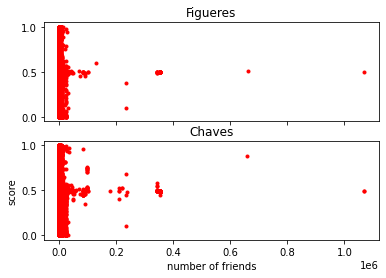

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
ax1.plot(figueres_df["friends"],  figueres_df["score"], 'ro', markersize=3)
ax2.plot(chaves_df["friends"], chaves_df["score"], 'ro', markersize=3)
ax1.set_title('Figueres')
ax2.set_title('Chaves')
plt.xlabel('number of friends')
plt.ylabel('score')
plt.show()

Comments done by people with a higher number of followers and friends seem to tend to be more neutral.

Predictions

In [ ]:
date = datetime.datetime(2020, 5, 20)
source  = 'Twitter for iPhone'
gender = 'male'
country = 'Costa Rica'
friends = 15000
followers = 10000
like = 300
share = 100
reply = 100
reach = 5000
relevance = 2
if country == 'Costa Rica':
  costa_rica = 1
else:
  costa_rica = 0

sample = np.array([date_to_int(date), coded_sources[source], coded_genders[gender], coded_countries[country], friends, followers, like, share, reply, costa_rica, reach, relevance]).reshape(1, -1)
print(f'Prediction for Figueres: {figueres_model.predict(sample)}')
print(f'Prediction for Chaves: {chaves_model.predict(sample)}')

Prediction for Figueres: [0.46463592]
Prediction for Chaves: [0.3033948]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
